In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("GlobalLandTemperaturesByCity.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')


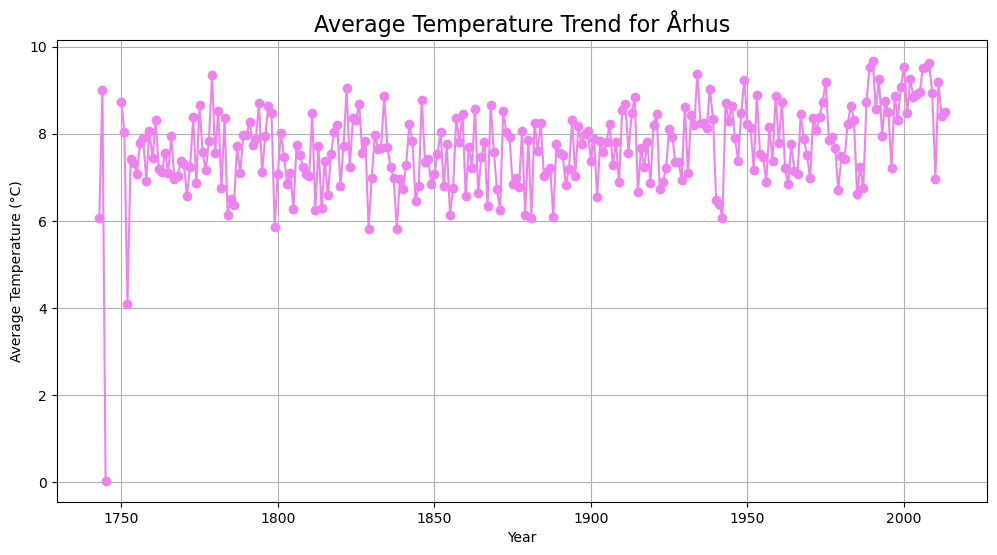

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
print(df.columns)
city_data = df[df['City'] == 'Århus'].copy() 
city_data['dt'] = pd.to_datetime(city_data['dt'], errors='coerce')
city_data['year'] = city_data['dt'].dt.year
annual_avg_year = city_data.groupby('year')['AverageTemperature'].mean().reset_index()
plt.figure(figsize=(12,6))
plt.plot(annual_avg_year['year'], annual_avg_year['AverageTemperature'], linestyle='-', marker='o', color='violet')
plt.title("Average Temperature Trend for Århus", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.show()

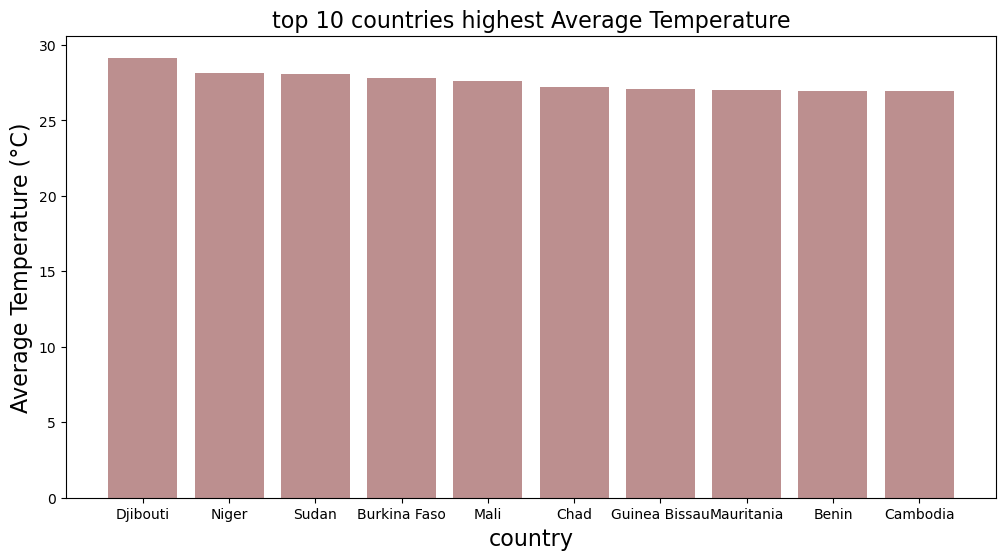

In [25]:
country_avg_temp = df.groupby('Country')['AverageTemperature'].mean().reset_index()
country_avg_temp=country_avg_temp.dropna()
top_countries=country_avg_temp.sort_values(by='AverageTemperature',ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(top_countries['Country'],top_countries['AverageTemperature'], color='rosybrown')
plt.title("top 10 countries highest Average Temperature", fontsize=16)
plt.xlabel("country",fontsize=16)
plt.ylabel("Average Temperature (°C)",fontsize=16)
plt.show()

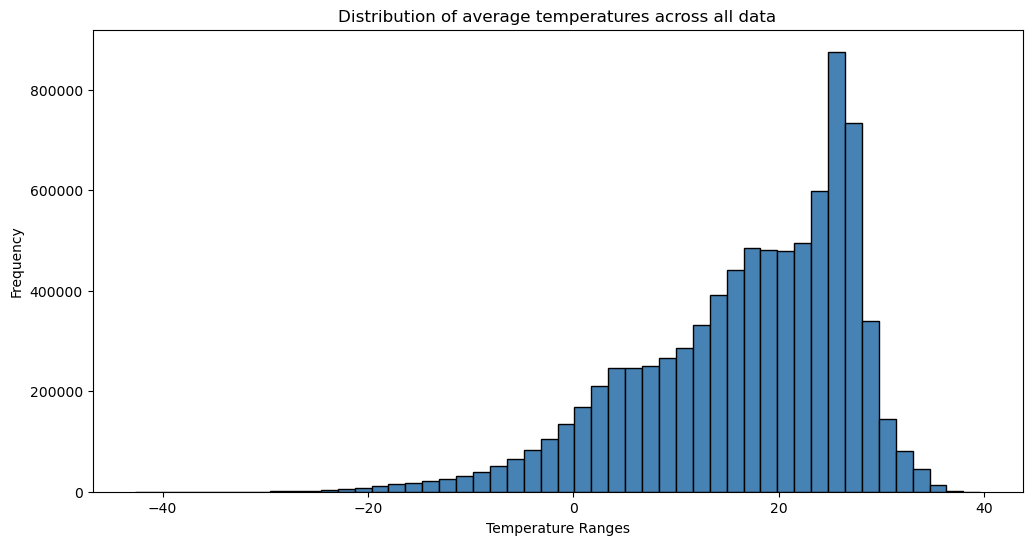

In [29]:
plt.figure(figsize=(12, 6))
plt.hist(df['AverageTemperature'], bins=50, color='steelblue', edgecolor='black')
plt.title('Distribution of average temperatures across all data')
plt.xlabel('Temperature Ranges')
plt.ylabel('Frequency')
plt.show()

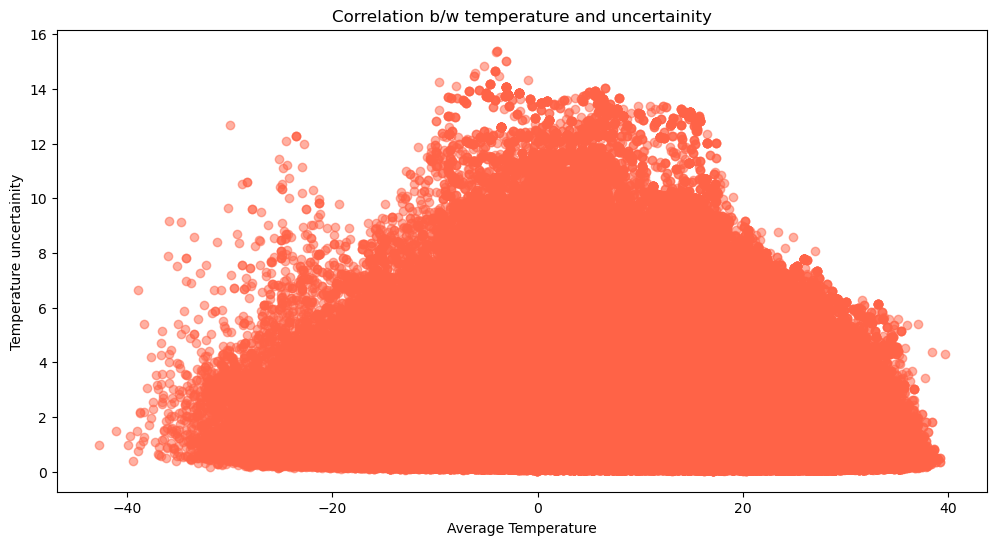

In [59]:
df.dropna()
plt.figure(figsize=(12,6))
plt.scatter(df['AverageTemperature'],df['AverageTemperatureUncertainty'],color='tomato',alpha=0.5)
plt.title("Correlation b/w temperature and uncertainity")
plt.xlabel('Average Temperature')
plt.ylabel('Temperature uncertainity')
plt.show()

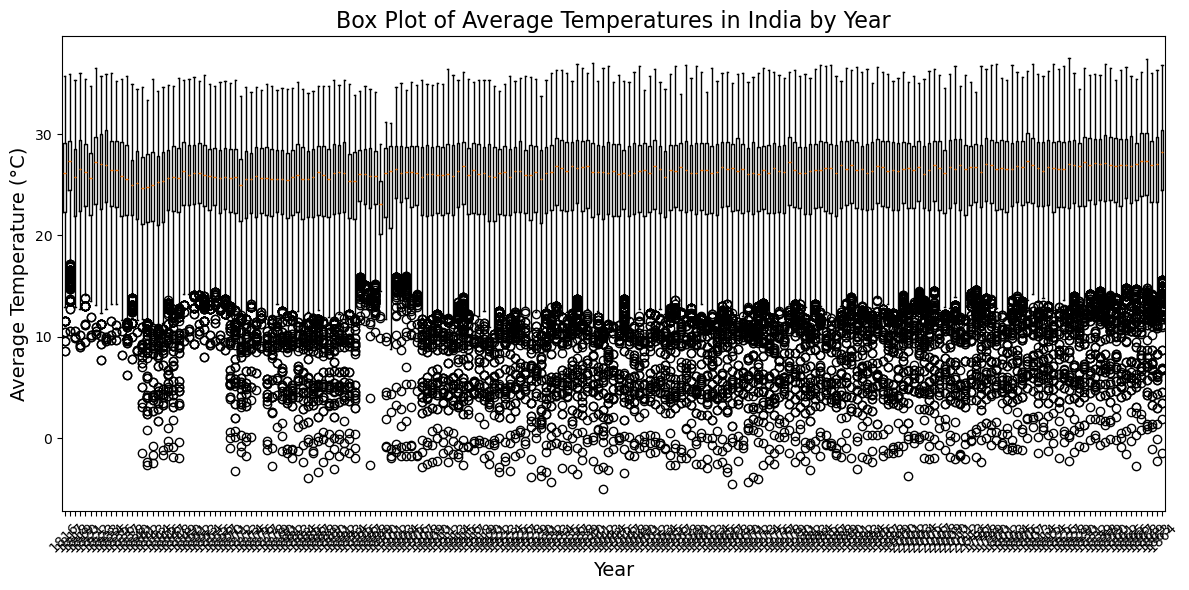

In [46]:
# import seaborn as sns
# country_data = df[df['Country'] == 'India'].copy()
# country_data['dt'] = pd.to_datetime(country_data['dt'], errors='coerce')
# country_data=country_dat.dropna(subset=['dt'])
# country_data['year'] = country_data['dt'].dt.year
# country_data_data=country_data[['year','AverageTemperature']].dropna()
# grouped_data=[group['AverageTemperature']for _,group in country_data.groupby('year')]
# plt.figure(figsize=(12,6))
# plt.boxplot(grouped_data

country_data = df[df['Country'] == 'India'].copy()
country_data['dt'] = pd.to_datetime(country_data['dt'], errors='coerce')
country_data = country_data.dropna(subset=['dt'])
country_data['year'] = country_data['dt'].dt.year
country_data_data = country_data[['year', 'AverageTemperature']].dropna()
grouped_data = [group['AverageTemperature'] for _, group in country_data_data.groupby('year')]
plt.figure(figsize=(12, 6))
plt.boxplot(grouped_data)
plt.xticks(range(1, len(grouped_data) + 1), country_data_data['year'].unique(), rotation=45)
plt.title('Box Plot of Average Temperatures in India by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temperature (°C)', fontsize=14)
plt.tight_layout()
plt.show()


In [43]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [44]:
import seaborn as sns
tips=sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


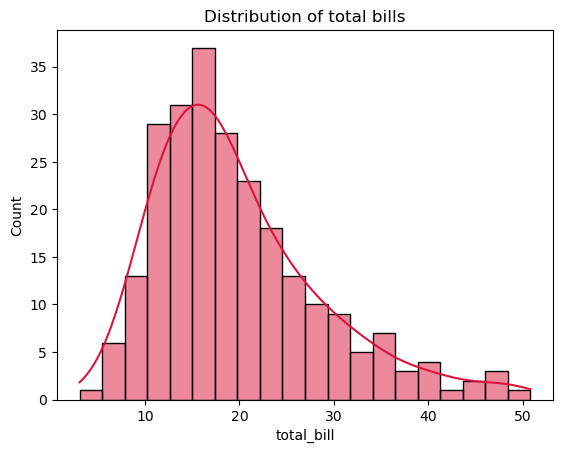

In [54]:
#kernel density estimation visualizes the probability density of a variable
sns.histplot(data=tips,x="total_bill",kde=True,bins=20,color='crimson')
plt.title("Distribution of total bills")
plt.show()

C:\Users\Proxy1\AppData\Local\Temp\ipykernel_4356\4249643486.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=tips,x='total_bill',shade=True,color='purple')


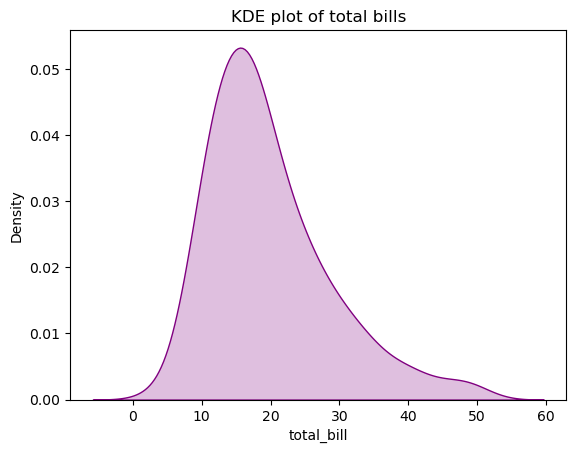

In [57]:
sns.kdeplot(data=tips,x='total_bill',shade=True,color='purple')
plt.title("KDE plot of total bills")
plt.show()

C:\Users\Proxy1\AppData\Local\Temp\ipykernel_4356\3937628926.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tips,x="day",y="total_bill",palette="YlOrBr")


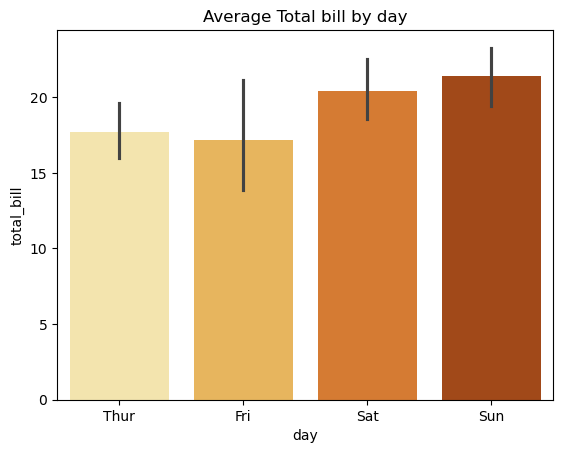

In [70]:
sns.barplot(data=tips,x="day",y="total_bill",palette="YlOrBr")
plt.title("Average Total bill by day")
plt.show()

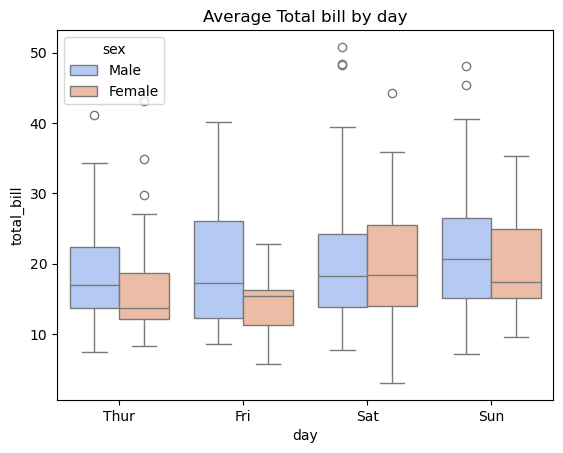

In [72]:
sns.boxplot(data=tips,x="day",y="total_bill",hue="sex",palette="coolwarm")
plt.title("Average Total bill by day")
plt.show()

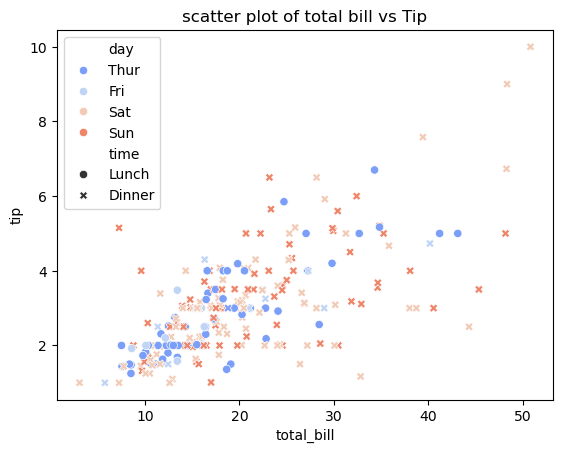

In [79]:
sns.scatterplot(data=tips,x="total_bill",y="tip",hue="day",style="time",palette="coolwarm")
plt.title("scatter plot of total bill vs Tip")
plt.show()

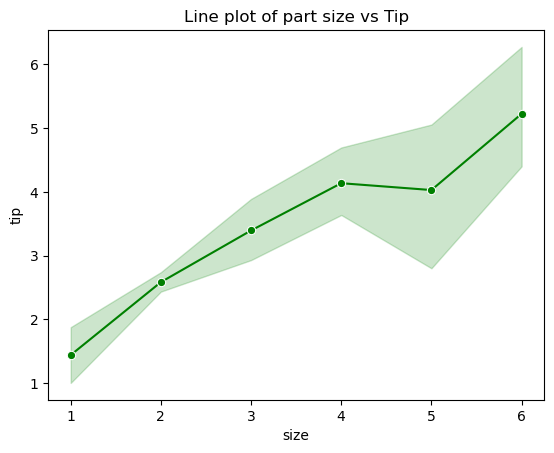

In [80]:
sns.lineplot(data=tips,x='size',y='tip',marker='o',color='green')
plt.title("Line plot of part size vs Tip")
plt.show()

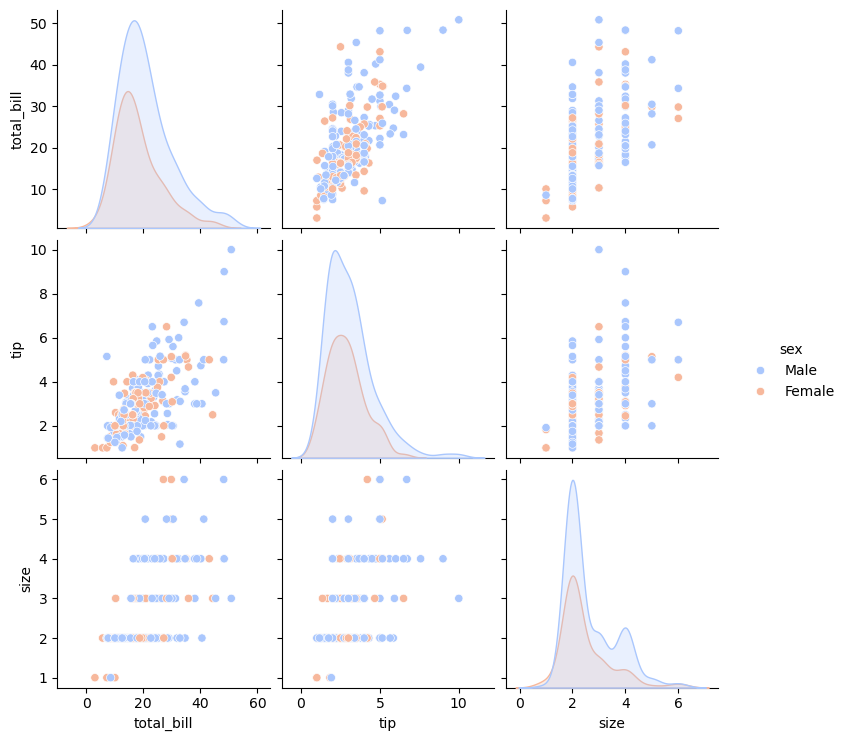

In [98]:
sns.pairplot(data=tips,hue="sex",palette="coolwarm")
plt.show()

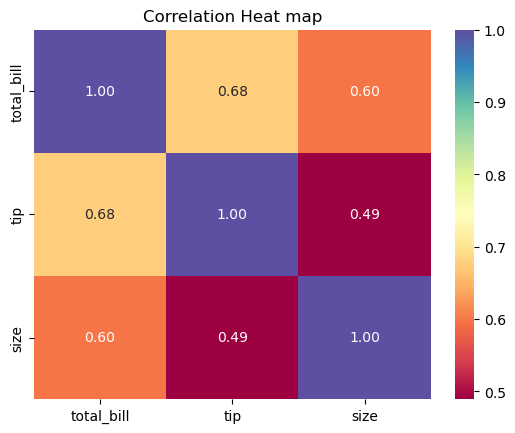

In [86]:
numeric_columns = tips.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix,annot=True,cmap="Spectral",fmt=".2f")
plt.title("Correlation Heat map")
plt.show()

C:\Users\Proxy1\AppData\Local\Temp\ipykernel_4356\3837947454.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='Pclass',y='Survived',errorbar=None,palette='coolwarm')


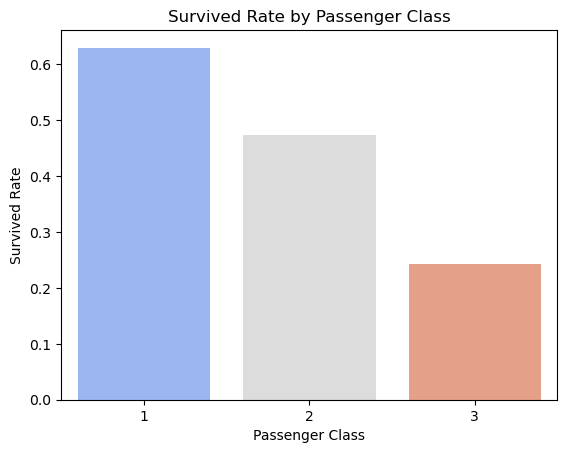

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("train.csv")
sns.barplot(data=df,x='Pclass',y='Survived',errorbar=None,palette='coolwarm')
plt.title('Survived Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survived Rate')
plt.show()

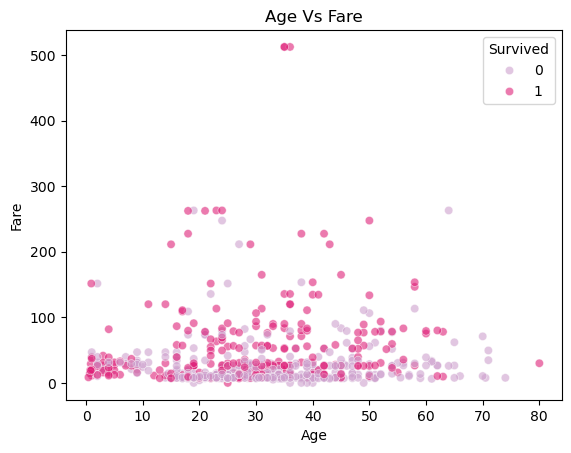

In [104]:
sns.scatterplot(data=df,x='Age',y='Fare',hue="Survived",palette="PuRd",alpha=0.6)
plt.title('Age Vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

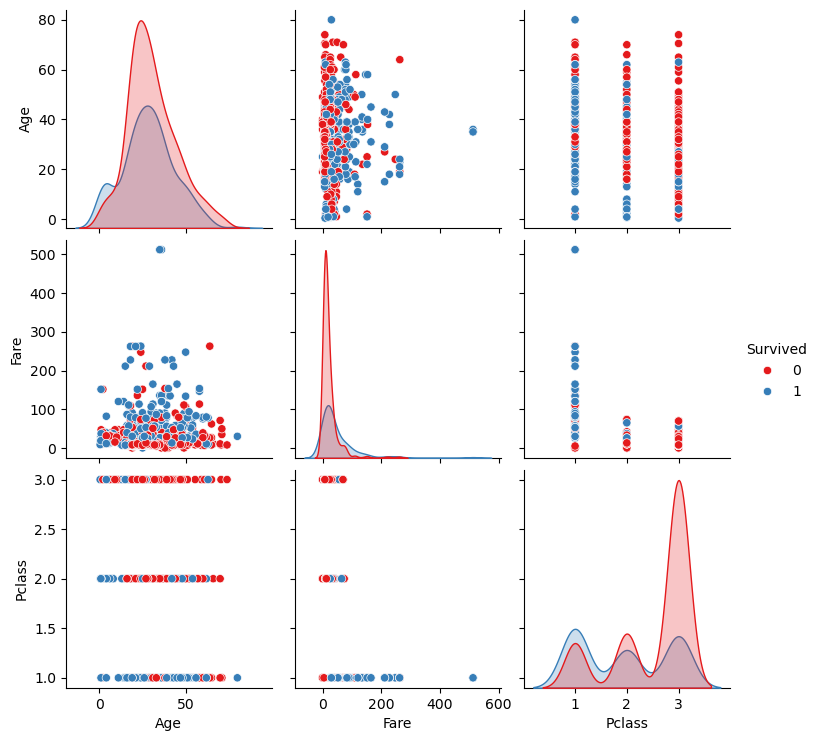

In [110]:
sns.pairplot(df[['Age', 'Fare', 'Pclass','Survived']], hue='Survived', palette='Set1',diag_kind='kde')
plt.show()

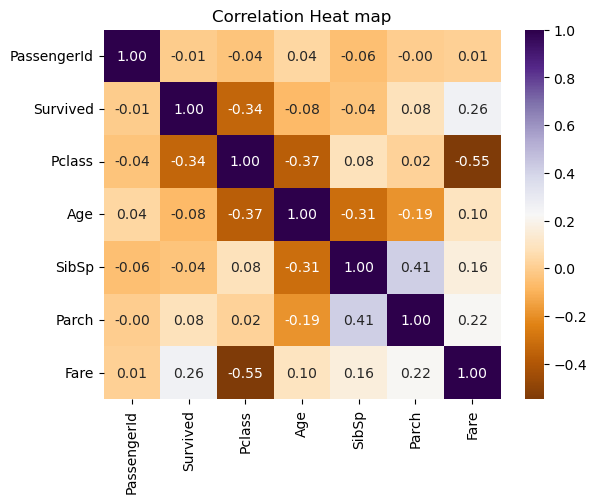

In [118]:
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix,annot=True,cmap="PuOr",fmt=".2f")
plt.title("Correlation Heat map")
plt.show()